In [114]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AutoRegResults
import matplotlib.pyplot as plt


In [100]:
num_samples=250
z=np.random.normal(size=num_samples, loc=0.0, scale=1.0)
x=np.zeros(num_samples)
phi=np.array([1/2,1/3])
for i in range(len(phi),num_samples):
    x[i]=np.dot(x[i-2:i],phi)+z[i]

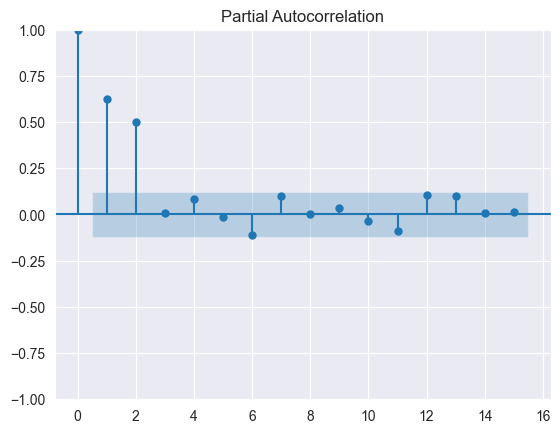

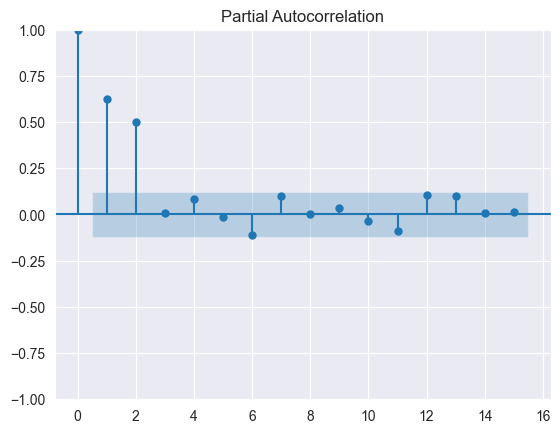

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(x, lags=15, method='ywm')

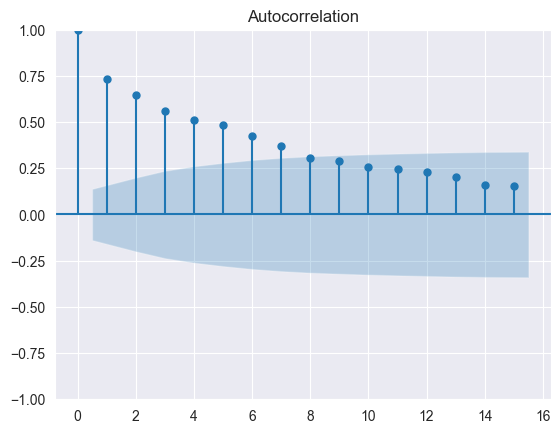

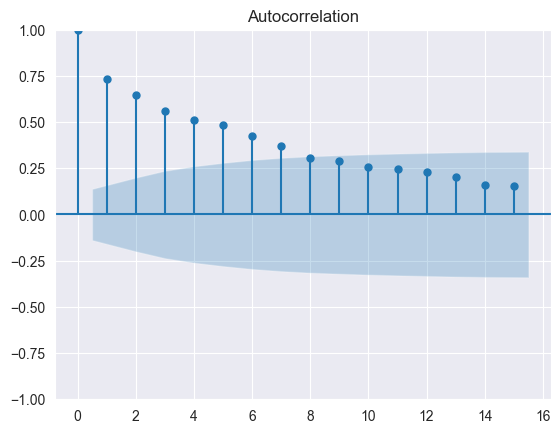

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=15)

In [101]:


ar_model = AutoReg(x, lags=2, seasonal=False).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  250
Model:                     AutoReg(2)   Log Likelihood                -329.449
Method:               Conditional MLE   S.D. of innovations              0.913
Date:                Thu, 15 Dec 2022   AIC                            666.898
Time:                        12:49:09   BIC                            680.952
Sample:                             2   HQIC                           672.555
                                  250                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0425      0.059     -0.725      0.468      -0.157       0.072
y.L1           0.2439      0.053      4.630      0.000       0.141       0.347
y.L2           0.5612      0.053     10.609      0.0

In [104]:
np.mean(np.abs(x))

1.0460063404166007

In [73]:
ar_results= AutoRegResults(ar_model.model, ar_model.params, ar_model.cov_params())

In [103]:
np.mean([np.abs(x[i]-ar_model.predict(start=i,end=i)[0]) for i in range(100,200)])

0.681123654227097

In [71]:
ar_results.get_prediction()

In [81]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(x, autolag='AIC')
df_stationarityTest[1]

0.0040275808308173275

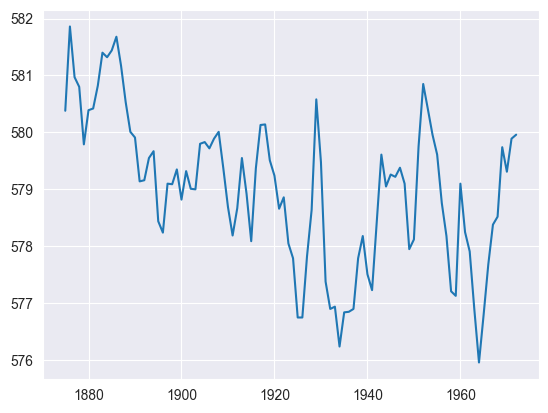

In [115]:
url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/LakeHuron.csv'
df = pd.read_csv(url,sep=",",index_col=0)
plt.plot(df['time'],df['value'])

In [117]:
df['prev_val']=df['value'].shift(1)

In [129]:
df['dif']=df.apply(lambda row: row['value']-row['prev_val'],axis=1)
df.dropna(axis=0,inplace=True)

In [130]:
import statsmodels.api as sm

sm.tsa.acf(df['dif'])

array([ 1.        ,  0.13192409, -0.18708745, -0.20348679, -0.08659856,
       -0.02631662, -0.05309149, -0.05545787,  0.01718605,  0.19993527,
        0.01917874, -0.13001939, -0.11229355, -0.03396133,  0.03619567,
        0.02986322,  0.07177546,  0.00840332, -0.07211906, -0.07490185])

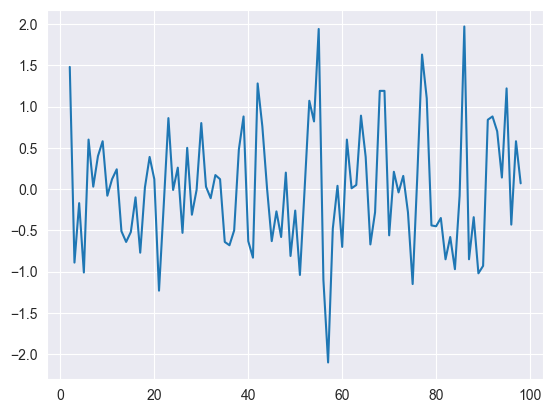

In [131]:
plt.plot(df['dif'])

In [139]:
ar_model=AutoReg(df['dif'].values,lags=[1,2]).fit()

In [140]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   97
Model:                     AutoReg(2)   Log Likelihood                -101.475
Method:               Conditional MLE   S.D. of innovations              0.704
Date:                Thu, 15 Dec 2022   AIC                            210.949
Time:                        13:28:04   BIC                            221.165
Sample:                             2   HQIC                           215.077
                                   97                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0091      0.072     -0.125      0.900      -0.151       0.133
y.L1           0.1921      0.099      1.943      0.052      -0.002       0.386
y.L2          -0.2137      0.097     -2.200      0.0